##**Uploading Our Dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


##**Importing The Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


**Reading In The Dataset**

In [ ]:
df=pd.read_table("marketing_campaign.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Renaming Some Columns for Clarity**

In [ ]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [ ]:
df.sample(n=2,random_state=0)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
670,9153,1964,PhD,Married,59304.0,0,1,29-07-2013,81,418,...,5,0,0,0,0,0,0,3,11,0
570,6818,1974,Graduation,Married,44989.0,0,1,12-09-2012,26,98,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:

df.shape

(2240, 29)

##**Data Cleaning**
**Checking FOr Missing Data**

In [ ]:
((df.isnull().sum()/df.shape[0])*100).round(2).astype(str) + ' %'

,0
ID,0.0 %
Year_Birth,0.0 %
Education,0.0 %
Marital_Status,0.0 %
Income,1.07 %
Kidhome,0.0 %
Teenhome,0.0 %
Dt_Customer,0.0 %
Recency,0.0 %
Wines,0.0 %


**Dropping Missing Data**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

0

**Checking For Duplicates**

In [ ]:
df.duplicated().sum()

0

##**Features Engineering**

**Age**

In [ ]:
current_year=pd.to_datetime('now').year
df['Age']=current_year-df['Year_Birth']

**Children**

In [ ]:
df['Children']=df['Kidhome']+df['Teenhome']
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,68,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,71,2


**Total Spent**

In [ ]:
df['Total_Spend']=df[['Wines','Fruits','Meat','Fish','Sweets','Gold']].sum(axis=1)

**Family_Size**

In [ ]:
df['Family_size']=df['Children']+df['Marital_Status'].apply(lambda x: 2 if x in ['Married','Together'] else 1)

In [ ]:
df[['Children','Marital_Status','Family_size']].sample(n=6)

**Spending Ratio**

In [ ]:
df['Spending_Ratio']=df.apply(lambda x: x['Total_Spend']/x['Recency'] if x['Recency']>0 else x['Total_Spend']/1 ,axis=1)

**Tenure of Customer**

In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='mixed')
df['Tenure']=current_year-df['Dt_Customer'].dt.year

In [ ]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Total_Spend,Family_size,Spending_Ratio,Tenure
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,68,0,1617,1,27.879310,13
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,71,2,27,3,0.710526,11


In [ ]:
df['Income'].min()

1730.0

##**Exploratory Data Analysis**
**Frequency Distribution Across Features**

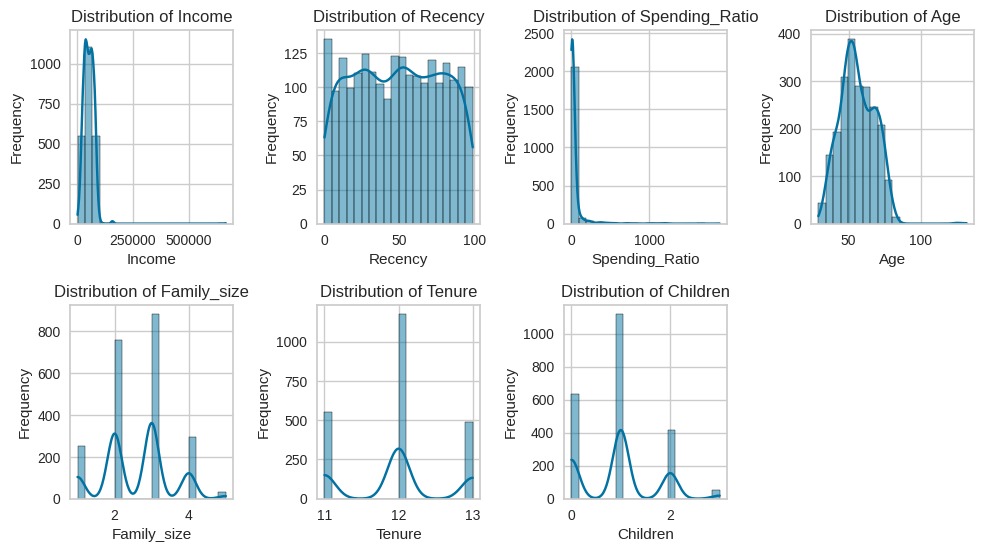

<Figure size 800x550 with 0 Axes>

In [ ]:
# Example for selected features
selected_features = ['Income', 'Recency', 'Spending_Ratio','Age','Family_size','Tenure','Children']

plt.figure(figsize=(10, 8))

for i, col in enumerate(selected_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


**Checking For Outliers**

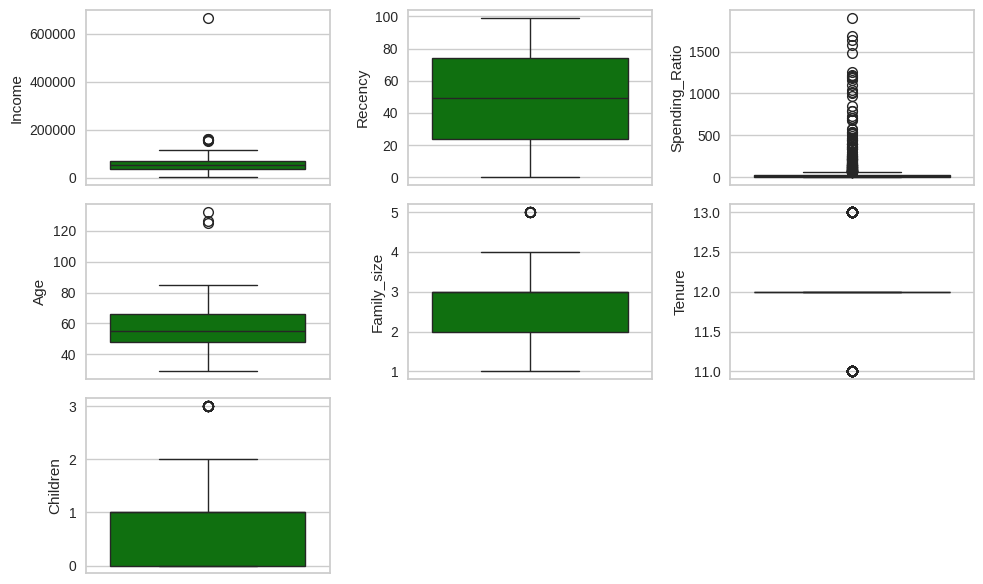

In [ ]:
plt.figure(figsize=(10,6))
for i,col in enumerate(selected_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[col],color='green')
  plt.tight_layout()
plt.show()


**Checking Outliers Using IQR Method on The Age Column**

In [ ]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
upper_bound

93.0

**Capping/Winsorization of Outliers on The Age Column**

In [ ]:
df['Age']=df['Age'].apply(lambda x: upper_bound if x>upper_bound else lower_bound if x<lower_bound else x)

**Confirming The Removal of Outliers**

In [ ]:
outliers=df[df['Age']>upper_bound]
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Total_Spend,Family_size,Spending_Ratio,Tenure


**Dropping Irrelevant Features**

In [ ]:
df.drop(['Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue','ID','Dt_Customer','Response','Complain'],axis=1,inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spend,Family_size,Spending_Ratio,Tenure
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,68.0,0,1617,1,27.879310,13
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,71.0,2,27,3,0.710526,11


**Label Encoding**

In [ ]:
label_encoder=LabelEncoder()
df['Education_encode']=label_encoder.fit_transform(df['Education'])
df['Marital_Status_encode']=label_encoder.fit_transform(df['Marital_Status'])

#status=['Education','Marital_Status']
#for col in status:
  #df[f'{col}_encoded']=labelEncoder.fit_transform(df[col])

In [ ]:
df['Education']=df['Education'].replace({'Graduation':'Graduates'})# Replacing Graduation with Graduates for better clarity

In [ ]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spend,Family_size,Spending_Ratio,Tenure,Education_encode,Marital_Status_encode
0,Graduates,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,68.0,0,1617,1,27.879310,13,2,4
1,Graduates,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,71.0,2,27,3,0.710526,11,2,4


**Reordering For Better Readability & Convenience**

In [ ]:
X=df[['Education_encode','Marital_Status_encode','Age','Tenure','Income','Children','Family_size','Recency','Total_Spend','Spending_Ratio']]


**Scaling The Feature**

In [ ]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X)
df_scaled=pd.DataFrame(df_scaled,columns=X.columns)
df_scaled.head(5)

,Education_encode,Marital_Status_encode,Age,Tenure,Income,Children,Family_size,Recency,Total_Spend,Spending_Ratio
0,-0.350527,0.254218,1.008423,1.500343,0.234063,-1.264803,-1.758673,0.310532,1.675488,-0.086058
1,-0.350527,0.254218,1.263348,-1.417393,-0.234559,1.405806,0.450009,-0.380509,-0.962358,-0.290875
2,-0.350527,1.182303,0.328625,0.041475,0.769478,-1.264803,-0.654332,-0.795134,0.280250,-0.071231
3,-0.350527,1.182303,-1.285895,-1.417393,-1.017239,0.070501,0.450009,-0.795134,-0.919224,-0.280864
4,1.429011,-0.673866,-1.030971,-1.417393,0.240221,0.070501,0.450009,1.554407,-0.307044,-0.262387


**Initializing For K using Kelbow Visualizer**

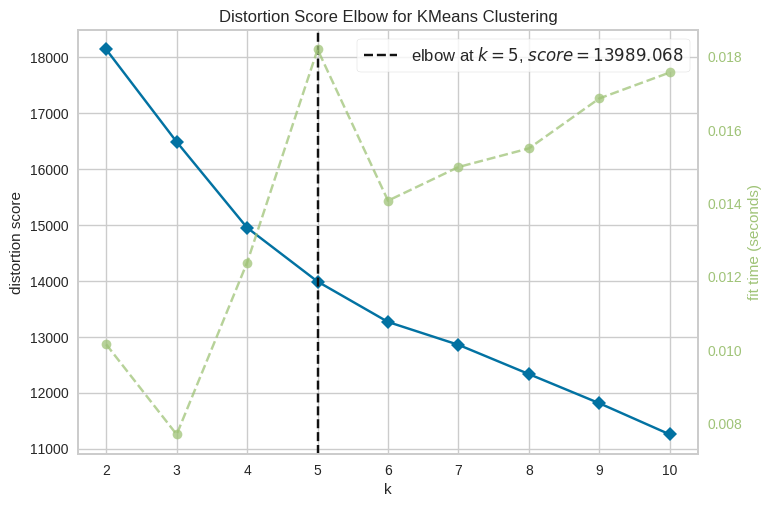

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=42)

# Use KElbowVisualizer to find the best k
visualizer = KElbowVisualizer(model)
visualizer.fit(df_scaled)
visualizer.show()

**Applying K means with Cluster=5**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels=kmeans.fit_predict(df_scaled)


**Add Cluster Label to Cluster**

In [ ]:
df['Cluster'] = labels


In [ ]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Total_Spend,Family_size,Spending_Ratio,Tenure,Education_encode,Marital_Status_encode,Cluster
0,Graduates,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,68.0,0,1617,1,27.879310,13,2,4,1
1,Graduates,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,71.0,2,27,3,0.710526,11,2,4,3


##**Visualizing The Data**

**Dimensionality Reduction & Visualizing Using A Scatterplot**

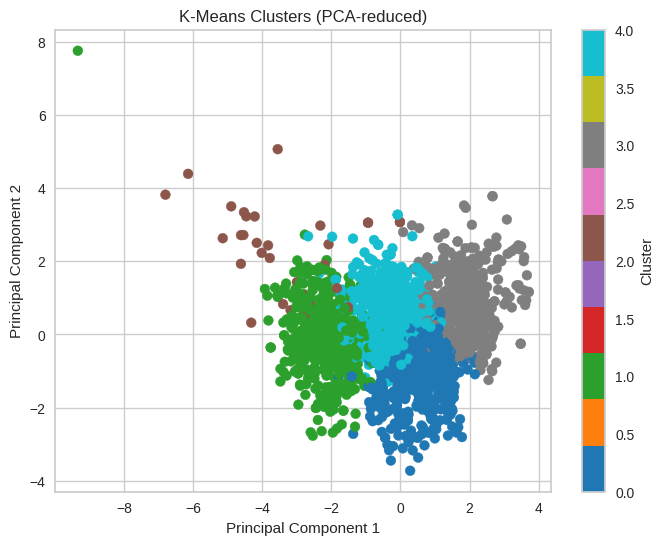

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['Cluster'], cmap='tab10', s=50)
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

##**Interpreting Our Data**
**Cluster Profiling**

In [ ]:
df['Cluster'].value_counts()

,count
Cluster,
0,678
4,583
1,481
3,443
2,31


In [ ]:
df.groupby('Cluster')[X.columns].mean()

,Education_encode,Marital_Status_encode,Age,Tenure,Income,Children,Family_size,Recency,Total_Spend,Spending_Ratio
Cluster,,,,,,,,,,
0,1.983776,3.691740,47.581121,11.942478,32269.238938,0.836283,2.488201,48.969027,149.019174,7.585418
1,2.409563,3.821206,55.632017,11.972973,78781.771310,0.091476,1.665281,53.022869,1431.259875,50.587380
2,2.419355,3.548387,59.774194,12.064516,72772.870968,0.419355,2.064516,0.967742,1218.322581,979.591398
3,2.539503,3.729120,59.539503,11.884876,44290.557562,2.112867,3.796840,50.607223,219.006772,10.571121
4,2.746141,3.694683,63.708405,12.065180,58543.150943,0.924528,2.591767,47.097770,722.161235,38.682086


##**FInal Interpretation**

In [ ]:
cluster_labels = {
    0: "Young Low-Income Families",
    1: "Affluent Empty Nesters",
    2: "Wealthy Seniors, Less Active",
    3: "Middle-Class Large Families",
    4: "Older Frequent Shoppers"
}

df["Cluster_Label"] = df["Cluster"].map(cluster_labels)


In [ ]:
df[['Education','Marital_Status','Income','Cluster','Cluster_Label']]

,Education,Marital_Status,Income,Cluster,Cluster_Label
0,Graduates,Single,58138.0,1,Affluent Empty Nesters
1,Graduates,Single,46344.0,3,Middle-Class Large Families
2,Graduates,Together,71613.0,1,Affluent Empty Nesters
3,Graduates,Together,26646.0,0,Young Low-Income Families
4,PhD,Married,58293.0,0,Young Low-Income Families
...,...,...,...,...,...
2235,Graduates,Married,61223.0,4,Older Frequent Shoppers
2236,PhD,Together,64014.0,3,Middle-Class Large Families
2237,Graduates,Divorced,56981.0,1,Affluent Empty Nesters
2238,Master,Together,69245.0,4,Older Frequent Shoppers
